# Prácticas DFI 2024: Primera Semana

In [453]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de constantes

c = 299792 #km/s

M = -19.3 

H_0 = 72

Hasta ahora hemos usado dos tipos de datos: los de la Tabla 4 del paper "*A 6% measurement of the Hubble parameter at z~0.45: direct evicende of the epoch of cosmic re-acceleration*", cantidades que se pueden observar en los archivos texto **hub_data3.txt**, y datos de *Pantheon*, tales como las magnitudes aparentes de supernovas tipo Ia ($m_b$). 

Lo que logramos graficar es: 

1. $H(z)$ : parámetro de Hubble
2. $f(z) = \frac{H(z)}{(1+z)} = \dot{a}$ : derivada del factor de escala
3. $D_L(z)$ : distancia de luminosidad
4. $D_A(z)$ : distancia angular diametral
5. $m_b (z)$ : magnitud aparente de las supernova

Añadiendo su respectivo ajuste polinomial a traves de la función *np.polyfit()* y barras de error en la mayoría de los casos.

# Usando datos de Tabla 4

In [454]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

#print("z:", columna1)
#print("H(z):", columna2)
#print("Desviación estándar:", columna3)

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

## Parámetro de Hubble: $H(z)$

Polinomio ajustado:        2
4.922 x + 59.87 x + 61.46


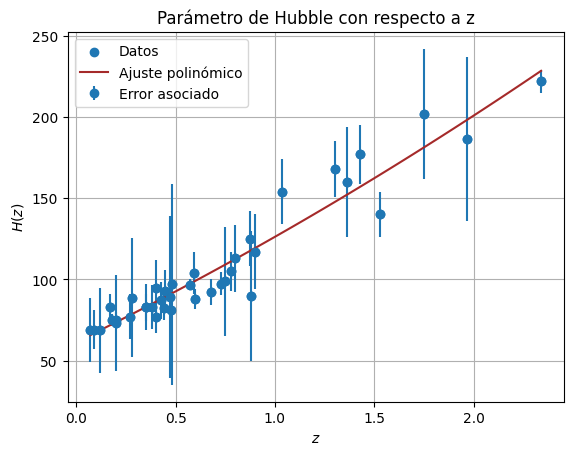

In [455]:
plt.errorbar(z, H, yerr=desv, fmt='o', label='Error asociado')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.grid(True)
plt.title('Parámetro de Hubble con respecto a z')


# Ajuste Lineal

coeficientes = np.polyfit(z, H, 2)

polinomio = np.poly1d(coeficientes)

print("Polinomio ajustado:", polinomio)

z_ajuste = np.linspace(min(z), max(z), 100)
D_ajuste = polinomio(z_ajuste)

plt.scatter(z, H, label='Datos')
plt.plot(z_ajuste, D_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
plt.show()


## Derivada de factor de escala: $f(z) = \frac{H(z)}{(1+z)} = \dot{a}$

En esta parte graficamos la función $f(z)$ con los datos ya mencionados. Para el ajuste polinómico tuvimos que separar los datos en dos, definiendo este punto de 'cambio' como z=0.5, valor similar a varios $z$ que definen la época en que el universo dejo de desacelerarse para empezar su fase de aceleración. Sabemos que este ajuste de los datos es ambiguo, por lo que pensamos cambiarlo a posterior. De todas maneras, se observa que hay cierto valor de $z$ donde la función cambia el signo de su derivada, tal que: 

1. $\ddot{a}<0$ : desaceleración
2. $\ddot{a}>0$ : aceleración

Polinomio ajustado:  
-10.64 x + 65.6


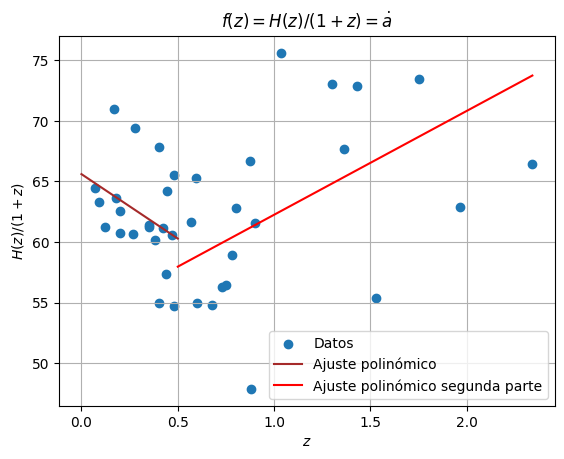

In [456]:
f = H/(1+z)

#Ajuste lineal: se hizo por partes

coeficientes_f = np.polyfit(z[0:20], f[0:20], 1)
coeficientes_f2 = np.polyfit(z[21:-1], f[21:-1], 1)

polinomio_f = np.poly1d(coeficientes_f)
polinomio_f2 = np.poly1d(coeficientes_f2)

print("Polinomio ajustado:", polinomio_f)

z_ajuste_f = np.linspace(0, 0.5, 100)
z_ajuste_f2 = np.linspace(0.5, max(z), 100)

f_ajuste = polinomio_f(z_ajuste_f)
f_ajuste_2 = polinomio_f2(z_ajuste_f2)

plt.scatter(z, f, label='Datos')
plt.plot(z_ajuste_f, f_ajuste, label='Ajuste polinómico', color='brown')
plt.plot(z_ajuste_f2, f_ajuste_2, label='Ajuste polinómico segunda parte', color='red')
plt.xlabel('$z$')
plt.ylabel('$H(z)/(1+z)$')
plt.title('$f(z) = H(z)/(1+z) = \dot{a}$')
plt.legend()
plt.grid(True)
plt.show()

## D(z) a partir de la integral

Usando: 

$$D_L(z) = c\frac{1+z}{H_0}\int_0^z \frac{dz}{E(z)}$$


Para cada $z$ calculamos la integral de 0 hasta ese $z$. Por lo tanto, los valores de las integrales se van sumando. Se usó el método de los trapecios(*) tal que para cada intervalo de $[0, z]$ se calculó: 

$$\int_0^z \frac{dz}{E(z)} = \frac{(z - 0)(E(z)^{-1} + E(0)^{-1})}{2} $$

Definiendo las siguientes cantidades: 

1. $H_0 = 72$
2. $c = 3 \cdot 10^5$ km/s  

(*)nota: también traté de solo sumar rectángulos, y ambos métodos cambian la forma de la función. Mientras que los trapecios dan como resultado una función de forma más 'lineal', los rectángulos le añaden apariencia 'exponencial'. Por lo tanto, ambos se ajustan a modelos del universo donde hay energía oscura. 

Polinomio ajustado:  
8935 x - 1376


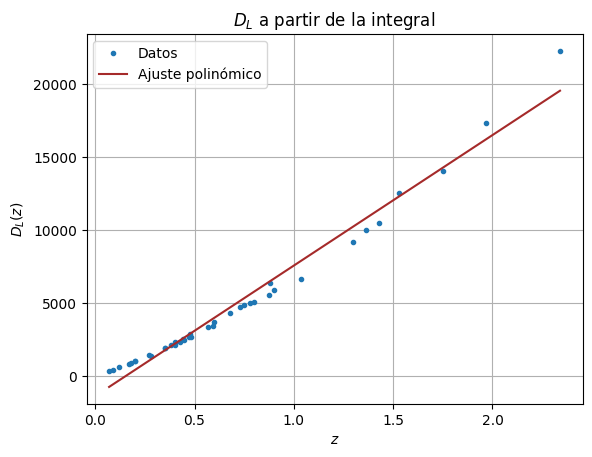

In [457]:
E = np.zeros(len(H))
integral = np.zeros(len(H))

for i in range(len(H)): 
    E[i] = H[i]/H_0

for i in range(len(H)):
    integral[i] = (z[i] - 0)*(1/E[i] + 1/E[0]) / 2


D_LH = np.zeros(len(H))

for i in range(len(H)):
    D_LH[i] = c*((1+z[i])/H_0)*integral[i]

# Ajuste Lineal

coeficientes_ = np.polyfit(z, D_LH, 1)



polinomio_ = np.poly1d(coeficientes_)

print("Polinomio ajustado:", polinomio_)

# Genera puntos para la curva ajustada
z_ajuste_ = np.linspace(min(z), max(z), 100)
D_LH_ajuste = polinomio_(z_ajuste_)

plt.plot(z, D_LH, '.', label = "Datos")
plt.plot(z_ajuste_, D_LH_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$D_L(z)$')
plt.title('$D_L$ a partir de la integral')
plt.legend()
plt.grid(True)
plt.show()


## Cálculo de $d_A$ a partir de $d_L$

Siguiendo la relación: 

$$d_A = \frac{d_L}{(1+z)^2}$$

Tenemos gráficos en bibliografía que pueden ser comparados con este. En tales se grafica $(H_0/c)d_A$ v/s $z$. 

Polinomio ajustado:           4          3          2
-0.05814 x + 0.3681 x - 0.8641 x + 0.954 x + 0.005598


Text(0.5, 1.0, 'Diametral Angular Distance ($D_A$) v/s z')

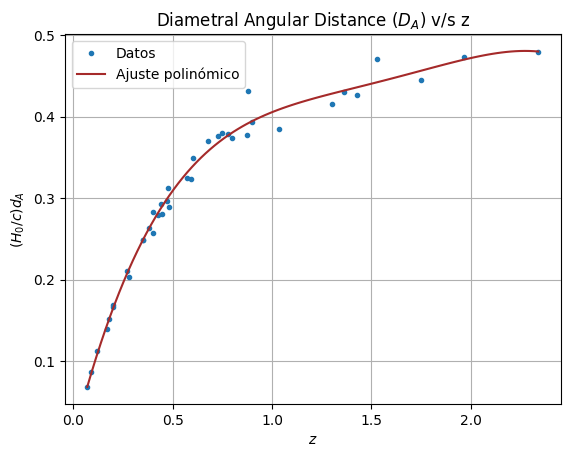

In [458]:
d_A = D_LH / ((1+z)**2)

# Ajuste Lineal con función np.polyfit
coeficientes_da = np.polyfit(z, (H_0/c)*d_A, 4)
polinomio_da = np.poly1d(coeficientes_da)
print("Polinomio ajustado:", polinomio_da)

z_ajuste_a = np.linspace(min(z), max(z), 100)
da_ajuste = polinomio_da(z_ajuste_a)

plt.plot(z, (H_0/c)*d_A, '.', label = 'Datos')
plt.plot(z_ajuste_a, da_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$(H_0/c)d_A$')
plt.legend()
plt.grid(True)
plt.title('Diametral Angular Distance ($D_A$) v/s z')


## Cálculo de $H_0$ a partir de gráfico de $D_L$ v/s $zc$

Debería ser su amplitud cuando $\lim{{z \to 0}}$, por lo que se toman pocos datos. 

(*) Falta confirmar si es amplitud o pendiente. 

Polinomio ajustado:  
0.01822 x - 83.52
H_0 = 0.018


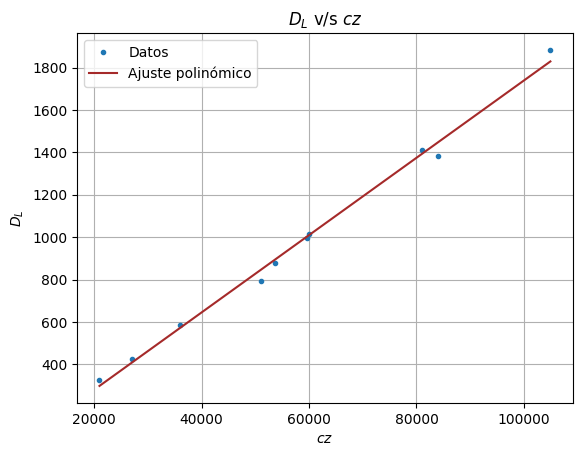

In [459]:
# Ajuste Lineal con función np.polyfit
coeficientes_0 = np.polyfit(z[0:10]*c, D_LH[0:10], 1)
polinomio_0 = np.poly1d(coeficientes_0)
print("Polinomio ajustado:", polinomio_0)
print('H_0 = 0.018')

z_ajuste_0 = np.linspace(min(z[0:10]*c), max(z[0:10]*c), 100)
h0_ajuste = polinomio_0(z_ajuste_0)

plt.plot(z[0:10]*c, D_LH[0:10], '.', label = 'Datos')
plt.plot(z_ajuste_0, h0_ajuste, label='Ajuste polinómico', color='brown')
plt.title('$D_L$ v/s $cz$')
plt.xlabel('$cz$')
plt.ylabel('$D_L$')
plt.legend()
plt.grid(True)
plt.show()

# Usando datos de Pantheon

Se usan datos de: lcparam_full_long.txt


In [460]:
# Extracción de datos

columna2 = [] #z_cmb
columna4 = [] #m_b
columna5 = [] #desv_m

with open('c:/Users/ximen/Desktop/Practicas DFI/lcparam_full_long.txt', 'r') as archivo:
    for linea in archivo:
        elementos = linea.split()

        columna2.append(elementos[1])
        columna4.append(elementos[4])
        columna5.append(elementos[5])

#print("z_cmb:", columna2)
#print("m_b:", columna4)
#print('desv_m:', columna5)

z_cmb = np.zeros(len(columna2))
for i in range(1,len(columna2)): #ya que el elemento 0 es un string
  z_cmb[i] = float(columna2[i])

m_b = np.zeros(len(columna4))
for i in range(1,len(columna4)):
  m_b[i] = float(columna4[i])

desv_m = np.zeros(len(columna5))
for i in range(1,len(columna5)):
  desv_m[i] = float(columna5[i])

# Se quitan los elementos 0 de cada lista porque son = 0 
z_cmb = z_cmb[1:]
m_b = m_b[1:]
desv_m = desv_m[1:]

## Distancia de Luminosidad: $D_L (z)$

En este caso solo se tenían las luminosidades aparentes, es decir, $m_b$, por lo que para calcular $D_L$ se usó la relación: 

$$m - M = 5log(D_L / Mpc) + 25$$

Se tomó la luminosidad absoluta de todas las supernova tipo Ia como una cantidad conocida e igual a $M = -19.3$. Por lo tanto: 

$$\frac{D_L}{Mpc} = 10^{(m - M - 25) / 5}$$

Para calcular el error asociado a las medidas de $D_L$ usamos la fórmula general de propagación de errores: 

$$\delta D_L = 2^{(m_b-M-25)/5}\cdot 5^{((m_b-M-25)/5 -1)} \cdot log(10) \cdot \delta m$$

Polinomio ajustado:       2
1105 x + 5363 x - 117.7


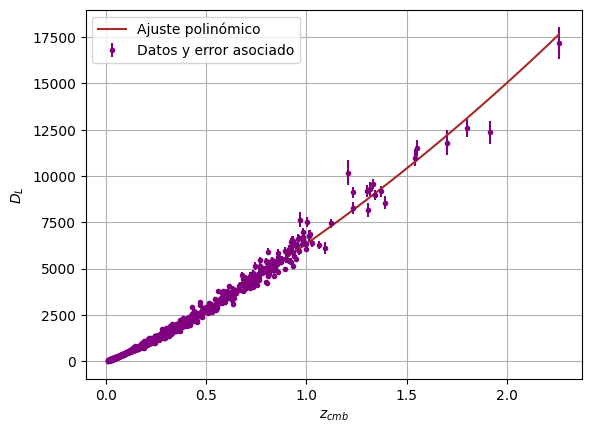

In [461]:
# calculo de D_L

D_L = 10**((m_b - 25 - M)/5) # En Mpc
desv_L = 2**((m_b-M-25)/5)*5**((m_b-M-25)/5 -1)*np.log10(10)*desv_m


# Ajuste Lineal con función np.polyfit

coeficientes = np.polyfit(z_cmb, D_L, 2)

polinomio = np.poly1d(coeficientes)

print("Polinomio ajustado:", polinomio)

z_ajuste = np.linspace(min(z_cmb), max(z_cmb), 100)
D_ajuste = polinomio(z_ajuste)


# Visualiza los datos y la curva ajustada
plt.errorbar(z_cmb, D_L, yerr=desv_L, label='Datos y error asociado',fmt='.', color = 'purple')
plt.plot(z_ajuste, D_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z_{cmb}$')
plt.ylabel('$D_L$')
plt.legend()
plt.grid(True)
plt.show()

## Cálculo de $D_A$ a partir de $D_L$

$$d_A = \frac{d_L}{(1+z)^2}$$

Tenemos gráficos en bibliografía que pueden ser comparados con este. En tales se grafica $(H_0/c)d_A$ v/s $z$. 

Polinomio ajustado:          5          4          3         2
0.07351 x - 0.4168 x + 0.9414 x - 1.223 x + 1.02 x - 0.0007


Text(0.5, 1.0, 'Diametral Angular Distance v/s z')

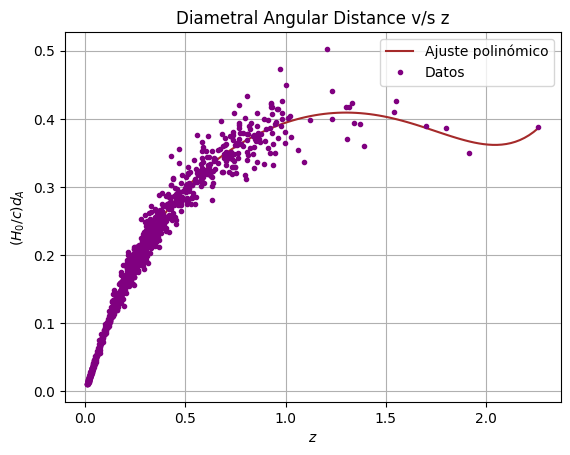

In [462]:
D_A = D_L / ((1+z_cmb)**2)

# Ajuste Lineal con función np.polyfit

coeficientes_DA = np.polyfit(z_cmb, (H_0/c)*D_A, 5)

polinomio_DA = np.poly1d(coeficientes_DA)

print("Polinomio ajustado:", polinomio_DA)

z_ajuste_A = np.linspace(min(z_cmb), max(z_cmb), 100)
DA_ajuste = polinomio_DA(z_ajuste_A)


# Visualiza los datos y la curva ajustada

plt.plot(z_ajuste_A, DA_ajuste, label='Ajuste polinómico', color='brown')
plt.plot(z_cmb, (H_0/c)*D_A, '.', label = 'Datos', color = 'purple')
plt.xlabel('$z$')
plt.ylabel('$(H_0/c)d_A$')
plt.legend()
plt.grid(True)
plt.title('Diametral Angular Distance v/s z')

## Midiendo $H_0$ a partir del grafico $m-M$ con respecto a log(z)

"En el límite $\lim {{z \to 0}}$, $m-M$ v/s $log_{10}(z)$ da una linea recta cuya amplitud a un valor dado de z dice el valor de $H_0$"

                                                                                     -Libro "Introduction to cosmology" pag. 154


Polinomio ajustado:  
2.4 x + 43.87


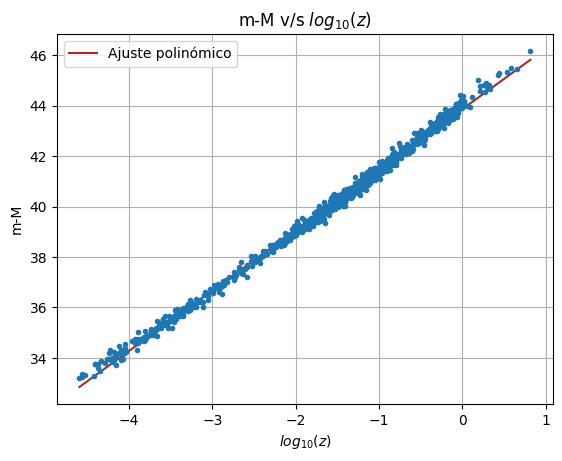

In [463]:
log = np.log(z_cmb)

# Ajuste lineal

coeficientes_H0 = np.polyfit(log, m_b - M, 1)

polinomio_H0 = np.poly1d(coeficientes_H0)

print("Polinomio ajustado:", polinomio_H0)

log_ajuste = np.linspace(min(log), max(log), 100)
H_0_ajuste = polinomio_H0(log_ajuste)

plt.plot(log_ajuste, H_0_ajuste, label='Ajuste polinómico', color='brown')
plt.plot(log, m_b-M, '.')
plt.xlabel('$log_{10}(z)$')
plt.ylabel('m-M')
plt.legend()
plt.grid(True)
plt.title('m-M v/s $log_{10}(z)$')
plt.show()

## Módulo de distancia $(\mu)$

Se calcula a través de la relación $\mu = 5 \cdot log(D_L / 10 pc)$

*Observaciones:*

1. El grafico no luce como el presentado en la bibliografía
2. La barras de error no se aprecian con facilidad (el error se calculó con la fórmula general de propagación de errores)
3. No se puede ajustar un polinomio adecuadamente

Polinomio ajustado:         4         3         2
-16.14 x + 73.96 x - 114.6 x + 77.1 x + 22.39


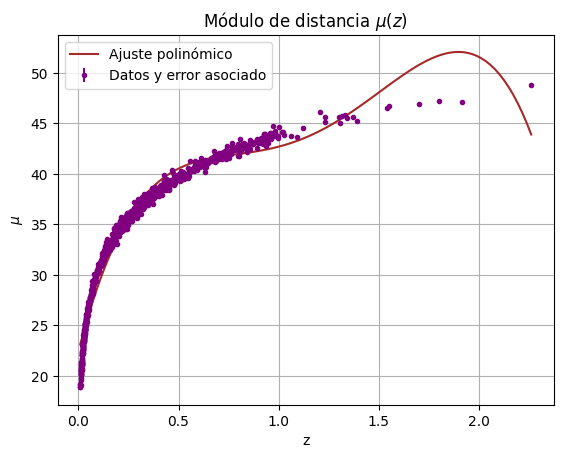

In [464]:
mu = 5*np.log(D_L)

desv_mu = (5/(D_L * np.log(10))) * desv_L

# Ajuste Lineal con función np.polyfit

coeficientes_mu = np.polyfit(z_cmb, mu, 4)

polinomio_mu = np.poly1d(coeficientes_mu)

print("Polinomio ajustado:", polinomio_mu)

z_ajuste_mu = np.linspace(min(z_cmb), max(z_cmb), 100)
mu_ajuste = polinomio_mu(z_ajuste_mu)

plt.errorbar(z_cmb, mu, yerr=desv_mu, label='Datos y error asociado',fmt='.', color = 'purple')
plt.plot(z_ajuste_mu, mu_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.title('Módulo de distancia $\mu(z)$')
plt.legend()
plt.grid(True)
plt.show()

## Magnitud aparente: $m_b(z)$

Aquí se graficó directamente $m_b$ con respecto a $z$ para comparar la forma de la función con otras fuentes. 

El ajuste lineal no entrega ningún polinomio que pueda fitearse bien a los datos. 

Polinomio ajustado:       2
1105 x + 5363 x - 117.7


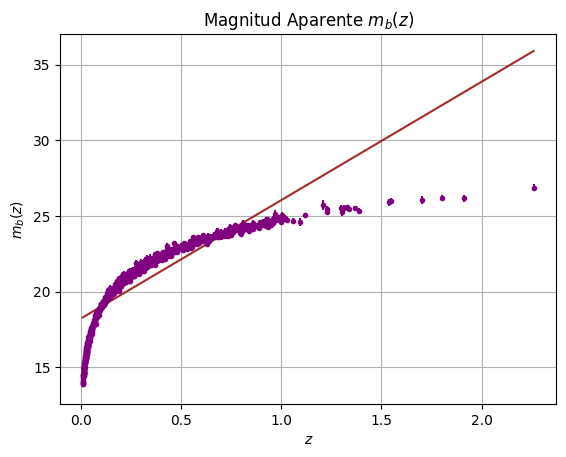

In [465]:
#m_b

# Ajuste Lineal

coeficientes_m = np.polyfit(z_cmb, m_b, 1)

polinomio_m = np.poly1d(coeficientes_m)

print("Polinomio ajustado:", polinomio)

# Genera puntos para la curva ajustada
z_ajuste_m = np.linspace(min(z_cmb), max(z_cmb), 100)
m_ajuste = polinomio_m(z_ajuste_m)


plt.errorbar(z_cmb, m_b, yerr=desv_m, fmt='.', label='Error asociado', color = 'purple')
plt.plot(z_ajuste_m, m_ajuste, label='Ajuste polinómico', color='brown')
plt.xlabel('$z$')
plt.ylabel('$m_b(z)$')
plt.grid(True)
plt.title('Magnitud Aparente $m_b(z)$')
plt.show()

## $H(z)$ a partir de la relación: $$H(z) = c(\frac{d}{dz}\frac{D_L(z)}{1+z})^{-1}$$

Con esto llegamos a un gráfico de $H(z)$ pero con los datos de Pantheon, hecho que nos deja comparar este gráfico con el que obtuvimos de los datos de la Tabla $4$. Lo intenté hacer de dos formas: 

1. Calculando la derivada centrada. 
2. Usando *np.gradient* para calcular la derivada. 

Ambas me dieron resultados similares pero que no coinciden con la apariencia general de $H(z)$ que, según los resultados de los datos anteriores y de otros trabajos, debería ser alguna curva creciente. 

In [466]:
#f = np.zeros(len(D_L))
#derivada = np.zeros(len(D_L))
#H_DL = np.zeros(len(D_L))

#for i in range(len(D_L)-1): 
 #   f[i] = D_L[i]/(1+z_cmb[i])
  #  derivada[i] = (f[i+1] - f[i])/(2*(z_cmb[i+1] - z_cmb[i]))

#for i in range(len(D_L)-1): 
 #   H_DL[i] = c*(1/(derivada[i]))

#for i in range(len(D_L) - 1): 
   #if H_DL[i] > -0.9e-9:
      #H_DL[i] = 0

#plt.plot(z_cmb, H_DL, '.')
#plt.ylabel('$H_{DL}$')
#plt.xlabel('$z$')
#plt.title('$H(z)$ calculado a partir de $D_L$') 

C:\Users\ximen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\ximen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\ximen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\ximen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:1248: RuntimeWarning: invalid value encountered in add
  out[t

Text(0.5, 1.0, '$H(z)$ calculado a partir de $D_L$ con np.gradient')

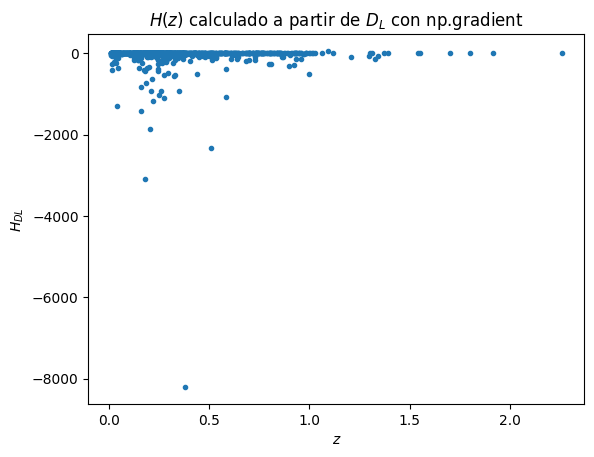

In [467]:
derivative = np.gradient(D_L / (1 + z_cmb), z_cmb)
H_DL = c*(1/derivative)

for i in range(len(D_L) - 1): 
   if H_DL[i] > -0.9e-9:
      H_DL[i] = 0

plt.plot(z_cmb, H_DL, '.')
plt.ylabel('$H_{DL}$')
plt.xlabel('$z$')
plt.title('$H(z)$ calculado a partir de $D_L$ con np.gradient')


# Progreso semana 2

**Objetivo:** Encontrar funciones teóricas para $H(z)$, $D_L(z)$ y $D_A(z)$, y empezar con algoritmo genético. 

## Funciones teóricas: 

$$H(z) = H_0 \left[\sum_{i} \Omega_{0, i}(1+z)^{3(1+ \omega)}\right]^{\frac{1}{2}}$$

Más generalmente en nuestro universo la ecuación puede tomar la forma: 

$$H(z) = H_0 \left[\Omega_{r, 0}(1+z)^{4} + \Omega_{m, 0}(1+z)^{3} + \Omega_{DE, 0}(1+z)^{3(1+\omega_{DE})} + (1 - \Omega_0)(1+z)^{2} \right]^{\frac{1}{2}}$$


Que cambia de forma dependiendo de la curvatura del universo. Siendo $\Omega_{0} = \Omega_{r, 0} + \Omega_{m, 0} + \Omega_{\Lambda, 0}$, esta cantidad puede tomar los siguientes valores: 

1. Universo plano: $\Omega_{0} = 1$ y $K = 0$. 
2. Universo cerrado: $\Omega_{0} > 1$ y $ K = 1$.
3. Universo abierto: $\Omega_{0} < 1$ y $K = -1$. 

$$D_L(z) = c\frac{(1+z)}{H_0} \int_0^z \frac{H_0}{H(z)} dz = c\frac{(1+z)}{H_0} \int_0^z \left[\sum_{i} \Omega_{0, i}(1+z)^{3(1+ \omega)}\right]^{\frac{-1}{2}} dz$$


In [468]:
def H_bm(z, Omega_r, Omega_m, Omega_lambda, omega_DE, Omega_0): 
    return H_0*np.sqrt((Omega_r*(1+z)**(3*(1 + 1/3)) + Omega_m*(1+z)**3 + Omega_lambda*(1+z)**(3*(1+omega_DE)) + (1-Omega_0)*(1+z)**2))

## Benchmark Model

Este describe un universo **plano** tal que: 

1. $\Omega_0 = 1$
2. $\Omega_{DE, 0} = \Omega_{\Lambda, 0}$ con $\omega = -1$.
3. $\Omega_{\gamma, 0} + \Omega_{\nu, 0} = \Omega_{r, 0} \approx 8.4\cdot 10^{-5}$
4. $\Omega_{bary, 0} + \Omega_{dm, 0} = \Omega_{m ,0 } \approx 0.3$
5. $\Omega_{\Lambda, 0} \approx 0.7$
6. $H_0 \approx 70$

In [469]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

#print("z:", columna1)
#print("H(z):", columna2)
#print("Desviación estándar:", columna3)

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])


H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

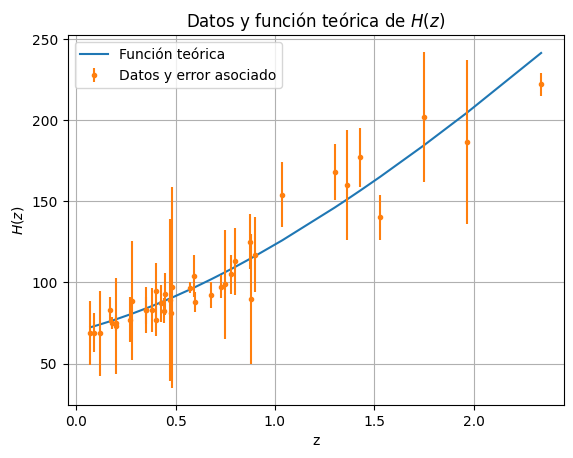

In [470]:
# Para Benchmark Model
H_0 = 70
O_r = 8.4*10**(-5)
O_m = 0.3
O_lambda = 0.7
o_DE = -1
O_0 = 1

# hub_data_3.txt

H_teorico = H_bm(z,O_r, O_m, O_lambda, o_DE, O_0)

plt.plot(z, H_teorico, label = 'Función teórica')
plt.errorbar(z, H, yerr=desv, fmt='.', label='Datos y error asociado')
plt.grid(True)
plt.title('Datos y función teórica de $H(z)$')
plt.xlabel('z')
plt.ylabel('$H(z)$')
plt.legend()
plt.show()

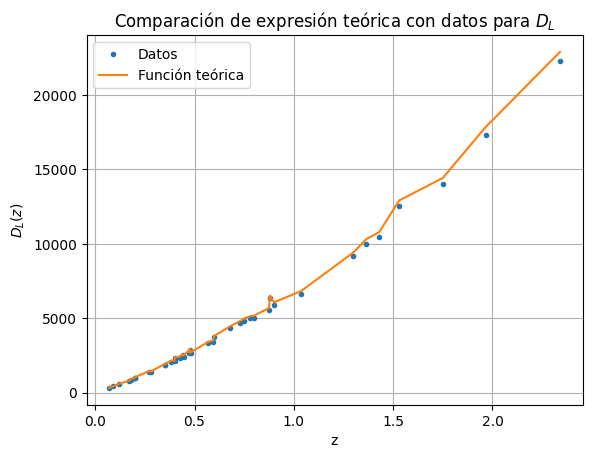

In [471]:
# Distancia de luminosidad

E_bm = np.zeros(len(H_teorico))
integral_bm = np.zeros(len(H_teorico))

for i in range(len(H_teorico)): 
    E_bm[i] = H_teorico[i]/H_0

for i in range(len(H_teorico)):
    integral_bm[i] = (z[i] - 0)*(1/E[i] + 1/E[0]) / 2

D_Lbm = c*(1+z)/H_0 * integral_bm

plt.plot(z, D_LH, '.', label = 'Datos')
plt.plot(z, D_Lbm, label = 'Función teórica')
plt.xlabel('z')
plt.ylabel('$D_L(z)$')
plt.title('Comparación de expresión teórica con datos para $D_L$')
plt.legend()
plt.grid(True)
plt.show()
